# Practice Training
Training quiz for skill get

In [1]:
from collections import Counter
import tensorflow as tf
import pickle
import numpy as np

In [2]:
# initialize quiz

right_point_counter = Counter()
wrong_point_counter = Counter()
total_point_counter = Counter()

right_wrong_ratio = Counter()
question_levels = Counter()

# Create answer points
answer_points = set()



In [10]:
# ONLY once when setup, set default value of ratio...
for i in range(len(answers)):
    update_quiz_state(i)

In [4]:
def save_datas():
    data = {
        'questions': questions,
        'answers': answers,
        'right_counter': right_point_counter,
        'wrong_counter': wrong_point_counter,
        'right_wrong_ratio': right_wrong_ratio,
        'question_levels': question_levels
    }
    with open('datas.pickle', 'wb') as f:
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# load answers from pickle
def load_datas():
    with open('datas.pickle', 'rb') as f:     
        # The protocol version used is detected automatically, so we do not     
        # have to specify it.     
        datas = pickle.load(f)
        return datas

def quiz_states():
    print("There's {} quizs, below a first 5 of them:".format(
            len(questions)
        ))
    for quiz in questions[:5]:
        print("  ", quiz[:65], "...")

## Tools for Practice 

In [5]:
# flatten nested list recursively
def flatten(l, a):
    for i in l:
        if isinstance(i, list):
            flatten(i, a)
        else:
            a.append(i)
    return a

def split_special_char(word, spliter):
    spliter_index = word.find(spliter)
    if spliter_index == -1:
        return word
    else:
        finished_part = word[:spliter_index] 
        outs = [finished_part, spliter]
        working_part = word[spliter_index+1:]

        outs.append(split_special_char(working_part, spliter))
        return outs

def split_out_points(answer):
    # noraml split with space, new line and remove empty
    pre_words = [line.split(" ") for line in answer.split('\n')]
    pre_words = flatten(pre_words, [])
    # special split (
    pre_words = [split_special_char(word, '(') for word in pre_words]
    pre_words = flatten(pre_words, [])
    # special split )
    pre_words = [split_special_char(word, ')') for word in pre_words]
    pre_words = flatten(pre_words, [])
    # special split [
    pre_words = [split_special_char(word, '[') for word in pre_words]
    pre_words = flatten(pre_words, [])
    # special split ]
    pre_words = [split_special_char(word, ']') for word in pre_words]
    pre_words = flatten(pre_words, [])
    # special split *
    pre_words = [split_special_char(word, '*') for word in pre_words]
    pre_words = flatten(pre_words, [])
    # special split :
    pre_words = [split_special_char(word, ':') for word in pre_words]
    pre_words = flatten(pre_words, [])    
    # remove '' in list
    pre_words = [word for word in pre_words if word != '']

    return pre_words 

In [6]:


# Update quiz states 
# update_quiz_state
# answer_index - int, index of answer of quiz
# check_flag - boolean, right or wrong by user
def update_quiz_state(answer_index, check_flag=False):

    # initialize answer word
    answer = answers[answer_index]
    points = split_out_points(answer)
    for point in points:
        if point not in answer_points:
            answer_points.add(point) 

    # Update right/wrong counter
    for point in points:
        if check_flag:
            right_point_counter[point] += 1
        else:
            wrong_point_counter[point] += 1

    # Update right wrong ratio
    for point in points:
        ratio = right_point_counter[point] / float(wrong_point_counter[point]+1)
        right_wrong_ratio[point] = ratio    
    
    # Update question level
    for i in range(len(answers)):
        questin_level = calculate_question_level(answer)
        question_levels[answer_index] = questin_level

In [7]:
# TODO: calculate question level based on right_wrong_ratio
def calculate_question_level(answer):
    points_in_answer = split_out_points(answer)
    mean_mark = 0
    # Use mean to prevent problem of less words answer appear often
    points_marks = [right_wrong_ratio[point] for point in points_in_answer]
    mean_mark = np.mean(points_marks)
    return mean_mark

def show_question_by(quiz_index):
    print(questions[quiz_index])

def check_word(flag):
    if flag:
        return 'Right (\/)'
    else:
        return 'NOT right. (X)'

In [8]:
def check_user_answer(user_answer, quiz_index):
    if type(user_answer) != 'str':
        user_answer = str(user_answer)

    # Check answer
    print('Answer is:', answers[quiz_index])
    is_right = user_answer == answers[quiz_index]
    print('You are', 
            check_word(is_right)
         )
    return is_right

## Load/reload datas from disk

In [48]:
# Load questions and answers from pickle

questions = []
answers = []
assert(len(questions) == 0)

datas = load_datas()
questions = datas['questions']
answers = datas['answers']

if len(right_point_counter) == 0:
    right_point_counter = datas['right_counter']
    wrong_point_counter = datas['wrong_counter']
    right_wrong_ratio = datas['right_wrong_ratio']
            
for index in range(len(answers)):
    question_levels[index] = calculate_question_level(answers[index])

assert(len(questions) != 0) # some loaded questions
quiz_states()

# Why after load_quiz, questions list become empty When I put it into a function?
## Why after assign questions, questions become empty?


There's 48 quizs, below a first 5 of them:
   Take the value(a) 1,000,000,000 and then add to it the value 10 t ...
   How to use List Comphrehension to calculate square values
    fro ...
   How many bytes of memory does train_features need?
    train_feat ...
   How many bytes of memory does train_labels need? 
    train_label ...
   How many bytes of memory does weights need? 
    weights Shape: ( ...


## Do Quiz

In [183]:
# Show question

shift_number = 6
max_number = 6
rand_index = np.random.randint(0, max_number, size=1)[0]
print(rand_index)
training_quizzes = list(reversed(question_levels.most_common()))

shifted_quizzes = training_quizzes[shift_number:]
# When do quiz, try starting from easy one should be a lowest learning curve
top_20_percent_quizzes = shifted_quizzes[:int(len(shifted_quizzes)*0.2)]
low_learning_curve_quizzes = list(reversed(top_20_percent_quizzes))

def stack_quiz(quizzes):
    splitted = np.split(np.array(quizzes), 1)
    stacked = np.stack(splitted)
    return stacked

shift_out = stack_quiz(training_quizzes[:shift_number])
train_in = stack_quiz(shifted_quizzes[:max_number])
# print(shift_out)
# print(train_in)
print(stack_quiz(low_learning_curve_quizzes))

quiz_index = low_learning_curve_quizzes[1][0]
print(quiz_index)
print('Index: ', quiz_index)
show_question_by(quiz_index)
# answers[quiz_index]
# split_out_points(answers[16])

2
[[[  7.           1.93617647]
  [ 39.           1.77266789]
  [ 44.           1.58902025]
  [ 33.           1.38861938]
  [ 42.           1.23604697]
  [ 41.           1.06355549]
  [ 47.           0.99728392]
  [ 34.           0.91559674]]]
39
Index:  39
This makes a list where each element is on step in the sequence
    with num_steps and x_one_hot
    rnn_inputs = ?
    


In [180]:
# User Answer field

user_answer = "rnn_inputs = []"

is_right = check_user_answer(user_answer, quiz_index)

Answer is: tf.concat([t1, t2], 1)
You are Right (\/)


In [181]:
# Update status
if is_right:
    update_quiz_state(quiz_index, True)
else:
    update_quiz_state(quiz_index)

In [128]:
# Pause for back to new quiz

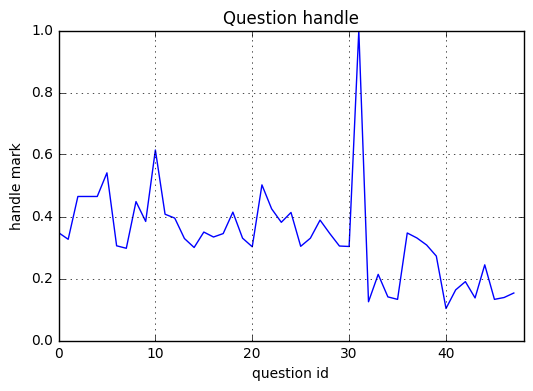

In [184]:
import matplotlib.pyplot as plt

# normaliz datas
x = list(question_levels)
y = [question_levels[_x] for _x in x]

max_question_mark = np.max(y)
y = [y_/max_question_mark for y_ in y]

# Draw a metric
plt.title('Question handle')
plt.xlabel('question id')
plt.ylabel('handle mark')
plt.axis([0, len(x), 0, np.max(y)])
plt.grid(True)

plt.plot(x, y)
plt.show()



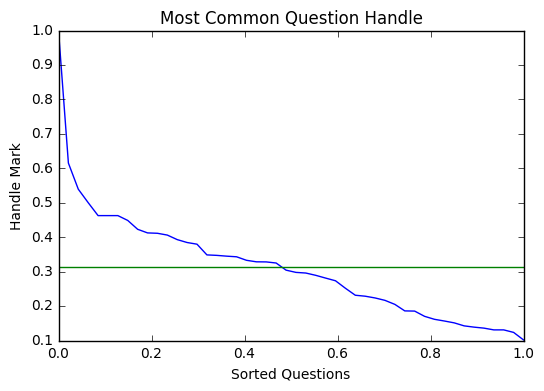

In [29]:
plt.title('Most Common Question Handle')
plt.xlabel('Sorted Questions')
plt.ylabel('Handle Mark')
y = list(reversed(sorted(y)))

# nromaliz x
max_x = np.max(x)
x = [_x / max_x for _x in x ]

plt.plot(x, y)
plt.plot(x, [np.mean(y) for i in range(len(y))])
plt.show()

# Thoughs
- Why it's keeping give me already handled question to test?
- points will be adjust towards to the right value while user keep doing quiz
- Keep user out of comfortable zone
- Keep adding new quiz
- Process of learning: add quizzes > do quiz > add quizzes
- Need a way to track how many new quiz a day handle
- Need check out speed of your quiz adding for project deadline
- Need build a github project for this tools

In [102]:
# TODO: 
# - add save right_point_counter, right_wrong_ratio in save_datas
# [d] draw working flow about practice training
# [d] finishing refine practice
# [d] Reload quiz
# - Remember each time wrong answers
# - try get user answer interactivly
# [d] random get lowest questions
# - why idx 7 always zero in question level? can not find 80 in answer points
# - move '(word)' out of inline question.
# - Don't set default ratio when initial

In [ ]:
# Things
# - Some short answers will get low sums of points, that will bring you old easy question many times.

In [74]:
save_datas()